In [1]:
import pandas as pd
import numpy as np

In [2]:
S0 = 100 # inital stock price
K = 100  # strike price
T = 1    # time to maturity in year
r = 0.06 # annual risk-free rate
N = 3    # number of time steps
u = 1.1  # up-factor in binomial tree
d = 1/u  # ensure recombing tree
opptype = 'C'  # Optio Tyoe C or P

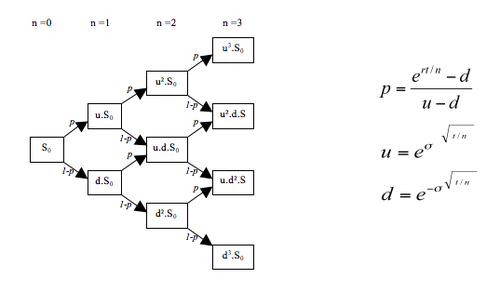 

## Slow Model

In [3]:
def binomial_tree_slow(K,T,S0,r,N,u,d,opptype='C'):
    dt = T/N
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)
    
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d
        
    C = np.zeros(N+1)
    for j in range(0,N+1):
        C[j] = max(0, S[j]-K)
        
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * (q*C[j+1] + (1-q)*C[j])
            
    return C[0]

binomial_tree_slow(K,T,S0,r,N,u,d,opptype='C')
    


10.145735799928817

## Fast Model

In [5]:
def binomial_tree_fast(K,T,S0,r,N,u,d,opptype='C'):
    dt = T/N
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)
    
    C = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1))
        
    C = np.maximum( C - K , np.zeros(N+1))
        
    for i in np.arange(N,0,-1):
        C = disc * (q * C[1:i+1] + (1-q) * C[0:i])
        
            
    return C[0]

binomial_tree_fast(K,T,S0,r,N,u,d,opptype='C')

10.145735799928826

## Compare the Two models together

In [ ]:
for N in [3,50,100,1000,5000]:
    binomial_tree_fast(K,T,S0,r,N,u,d,opptype='C')
    binomial_tree_slow(K,T,S0,r,N,u,d,opptype='C')
